```{image} ../images/netcdf_portada_1.png
:width: 300px
:align: center
:alt: NetCDF y GRIB
```

# Exploración de formatos climáticos: NetCDF y GRIB

---

## 📚 Descripción general

En este cuaderno aprenderás sobre los dos formatos de archivo más comunes en ciencias atmosféricas:

1. **Formato NetCDF** - Características, estructura y uso práctico
2. **Formato GRIB** - Ventajas para pronósticos meteorológicos
3. **Lectura de archivos** - Cómo abrir y explorar datos usando Xarray
4. **Comparación** - Cuándo usar cada formato en tu trabajo

Usaremos datos reales de temperatura superficial del mar (SST) para ejemplos prácticos.

## ✅ Requisitos previos

| Concepto | Importancia | Notas |
| --- | --- | --- |
| [Introducción a Xarray](./1.4.Introduccion-Xarray.ipynb) | Necesario | Lectura de datos multidimensionales |
| [Introducción a NumPy](./1.2.Introduccion-Numpy.ipynb) | Necesario | Arrays multidimensionales |
| Conocimientos de meteorología | Útil | Variables atmosféricas |

⏱️ **Tiempo estimado de aprendizaje**:
- 📖 Lectura y ejecución: 20–25 minutos

✍️ **Formato**: interactivo, ejecuta el código a medida que avanzas


## Librerías

Importamos las librerías necesarias para este cuaderno.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## 1. Formato NetCDF

**NetCDF (Network Common Data Form)** es un formato de archivo binario auto-descriptivo ampliamente utilizado en las ciencias atmosféricas.

```{image} ../images/Netcdf_1.png
:width: 300px
:align: center
:alt: Estructura NetCDF
```

### 🔍 Características principales
- Almacena datos multidimensionales (tiempo, latitud, longitud, nivel)
- Permite metadatos descriptivos
- Soporta estructuras jerárquicas (NetCDF-4)

### ✅ Ventajas
- Fácil de explorar con `xarray`
- Compatible con muchas herramientas científicas
- Ideal para almacenamiento a largo plazo

### ⚠️ Desventajas
- Tamaño de archivo mayor comparado con GRIB
- Puede ser más lento para acceso puntual

### 🔄 Versiones
- **Classic**: estructura simple y universal
- **NetCDF-4**: permite compresión y grupos jerárquicos

### Consejos para trabajar con NetCDF

- Usa `ds.sel()` y `ds.isel()` para filtrar por dimensión
- Verifica unidades (`ds.attrs`, `ds.variable.attrs`)
- Verifica el formato de fechas (`time` en UTC)

In [2]:
# Lectura de archivo NetCDF usando datos reales de SST
ds = xr.open_dataset('../data/sst.mnmean.nc')
print("Dataset cargado exitosamente:")
ds

Dataset cargado exitosamente:


<xarray.Dataset> Size: 131MB
Dimensions:  (time: 2037, lat: 89, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2023-09-01
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Data variables:
    sst      (time, lat, lon) float32 131MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2023-10-03

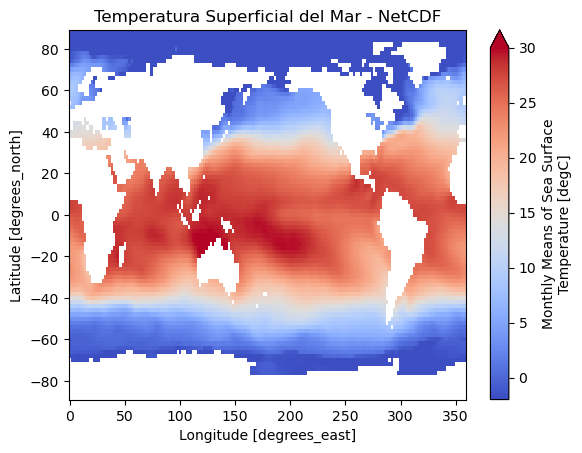

In [3]:
# Visualización de SST para un mes específico
ds['sst'].isel(time=0).plot(cmap='coolwarm', vmin=-2, vmax=30)
plt.title('Temperatura Superficial del Mar - NetCDF')
plt.show()

---

## 2. Formato GRIB

**GRIB (GRIdded Binary)** es un formato binario eficiente utilizado principalmente para pronósticos numéricos del tiempo.

```{image} ../images/grib_1.png
:width: 300px
:align: center
:alt: Estructura GRIB
```

### 🔍 Características principales
- Datos almacenados como registros binarios con encabezados
- Alta eficiencia en tamaño y lectura
- Muy usado por servicios meteorológicos operativos

### ✅ Ventajas
- Tamaño de archivo reducido
- Acceso puntual eficiente
- Ideal para distribución de pronósticos

### ⚠️ Desventajas
- Menos intuitivo que NetCDF
- Requiere herramientas específicas como `cfgrib`

### 🔄 Versiones
- **GRIB1**: formato más simple y aún en uso
- **GRIB2**: admite más metadatos y compresión

### Consejos para trabajar con GRIB

- Usa `engine='cfgrib'` con Xarray
- Explora claves con `filter_by_keys` si hay múltiples campos
- Presta atención al paso temporal (`step`), tipo de nivel y superficie

```{admonition} Instalación de cfgrib
:class: warning

Para leer archivos GRIB necesitas instalar cfgrib:
```bash
conda install -c conda-forge cfgrib
```
```

In [4]:
# Ejemplo de lectura GRIB (requiere archivo GRIB y cfgrib instalado)
# ds_grib = xr.open_dataset('ruta/archivo.grib', engine='cfgrib')
# ds_grib

# Para este cuaderno, nos enfocamos en NetCDF que es más común para análisis científico.
# Los archivos GRIB se usan principalmente para pronósticos operativos.

---

## Práctica: Explorando datos NetCDF

Usa el dataset de SST que acabamos de cargar para completar estas tareas:

**Tareas:**
1. ¿Cuántas dimensiones tiene el dataset?
2. ¿Qué rango temporal cubre?
3. Extrae y grafica la SST promedio global para el primer año de datos

**Pista**: Usa `.dims`, `.time`, y `.mean()` para ayudarte.

In [5]:
# Tu código aquí

````{admonition} Solución
:class: dropdown

```python
# 1. Dimensiones
print("Dimensiones:", ds.dims)

# 2. Rango temporal
print(f"Desde: {ds.time.min().values}")
print(f"Hasta: {ds.time.max().values}")

# 3. SST promedio global para primer año
sst_primer_año = ds['sst'].isel(time=slice(0, 12))  # Primeros 12 meses
sst_promedio = sst_primer_año.mean(dim=['lat', 'lon'])
sst_promedio.plot()
plt.title('SST Promedio Global - Primer Año')
plt.ylabel('Temperatura (°C)')
plt.show()
```
````

---

## Comparación de formatos

| Aspecto | NetCDF | GRIB |
|---------|--------|------|
| **Compresión** | Opcional (NetCDF-4) | Alta (GRIB2) |
| **Facilidad de uso** | Más intuitivo | Requiere herramientas específicas |
| **Propósito** | Análisis científico | Distribución operativa |
| **Estructura** | Auto-descriptiva | Encabezados + binario |
| **Ecosistema Python** | Excelente (Xarray) | Bueno (cfgrib) |

---

## Resumen

En este cuaderno aprendiste:

✅ **Formato NetCDF**: Auto-descriptivo, ideal para análisis científico, excelente integración con Xarray

✅ **Formato GRIB**: Eficiente y compacto, usado para pronósticos operativos

✅ **Uso práctico**: Cómo cargar y explorar archivos NetCDF con Xarray

✅ **Comparación**: NetCDF es más flexible para análisis, GRIB es óptimo para distribución de modelos

El manejo de estos formatos con Python te permite construir flujos de trabajo robustos para proyectos climáticos, energéticos y operativos.

### ¿Qué sigue?

Ahora que entiendes los formatos tradicionales NetCDF y GRIB, en el siguiente cuaderno explorarás **formatos ARCO (Analysis-Ready Cloud-Optimized)** como Zarr, que permiten acceso eficiente a grandes volúmenes de datos en la nube sin descargarlos completamente.

👉 Continúa con: [Formatos ARCO y Zarr](./1.7.Formatos-ARCO-Zarr.ipynb)

## 📚 Recursos y Bibliografía
- Earth Lab. (s.f.). *Introduction to Climate Data in NetCDF Format*. University of Colorado Boulder. https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-climate-data/
- ECMWF. (2014). *GRIB – NetCDF: Setting the Scene*. https://www.ecmwf.int/sites/default/files/elibrary/2014/13706-grib-netcdf-setting-scene.pdf
- UCAR Unidata. (s.f.). *NetCDF Documentation*. https://www.unidata.ucar.edu/software/netcdf/docs/
- ECMWF. (s.f.). *GRIB API & ecCodes*. https://confluence.ecmwf.int/display/ECC